In [1]:
import numpy as np
import matplotlib.pyplot as plt
import svgwrite
import os

In [2]:
def read_csv(filepath):
    data = np.genfromtxt(filepath, delimiter=',', skip_header=1)
    polylines_dict = {}

    for row in data:
        polyline_id = int(row[0])
        x = row[2]
        y = row[3]
        
        if polyline_id not in polylines_dict:
            polylines_dict[polyline_id] = []
        
        polylines_dict[polyline_id].append((x, y))

    
    polylines = [np.array(points) for points in polylines_dict.values()]
    return polylines


In [3]:
def plot_all_polylines(polylines):
    fig, ax = plt.subplots(figsize=(9, 9))
    
    cmap = plt.get_cmap('tab10')  
    num_colors = len(polylines)
    colors = [cmap(i / num_colors) for i in range(num_colors)]
    
    for polyline, color in zip(polylines, colors):
        ax.plot(polyline[:, 0], polyline[:, 1], marker='o', linewidth=2, color=color)
    
    ax.set_aspect('equal')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Polylines Plot with Distinct Colors')
    plt.grid(True)
    plt.show()

In [4]:
def plot_individual_polylines(polylines):
    cmap = plt.get_cmap('tab10')  
    num_colors = len(polylines)
    colors = [cmap(i / num_colors) for i in range(num_colors)]
    
    for idx, (polyline, color) in enumerate(zip(polylines, colors)):
        fig, ax = plt.subplots(figsize=(9, 9))
        ax.plot(polyline[:, 0], polyline[:, 1], marker='o', linewidth=2, color=color)
        
        ax.set_aspect('equal')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_title(f'Polyline {idx + 1} Plot')
        plt.grid(True)
        plt.show()

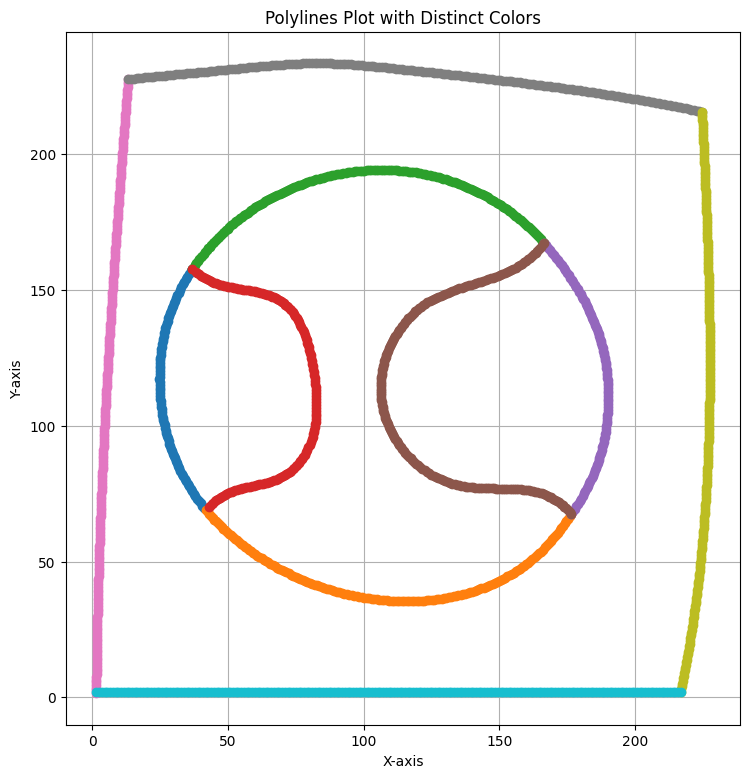

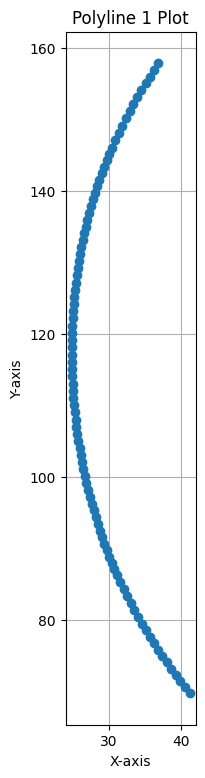

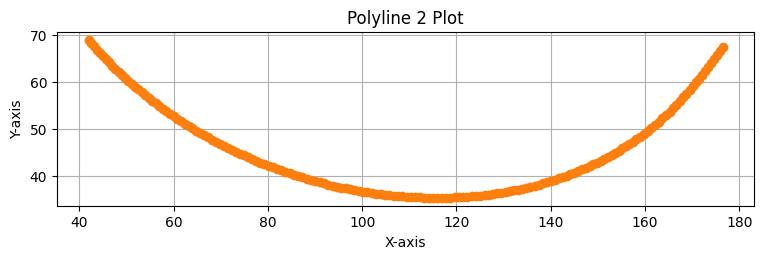

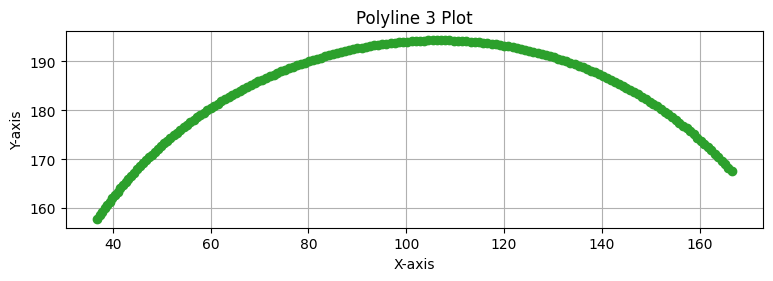

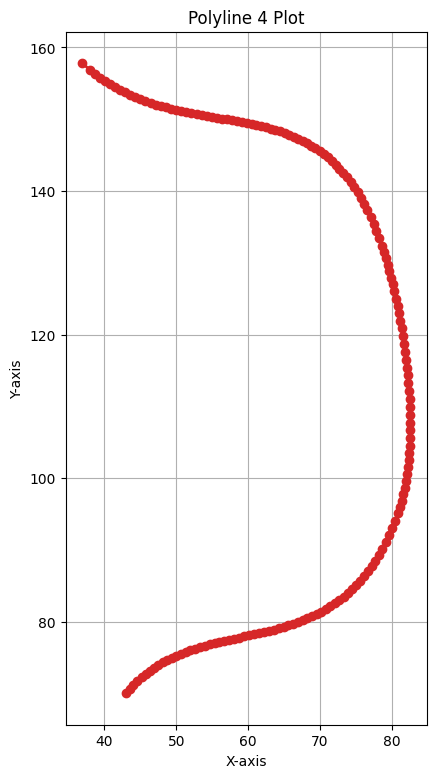

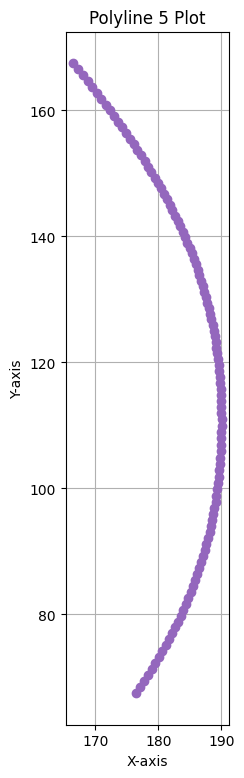

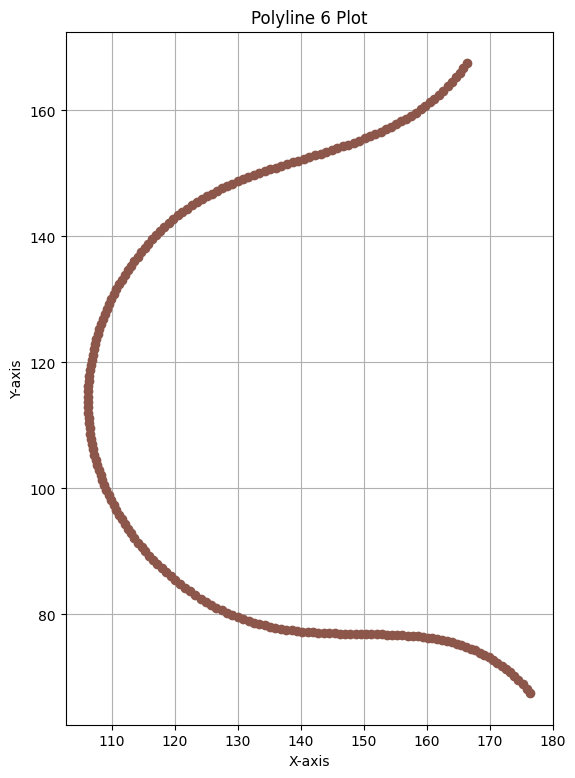

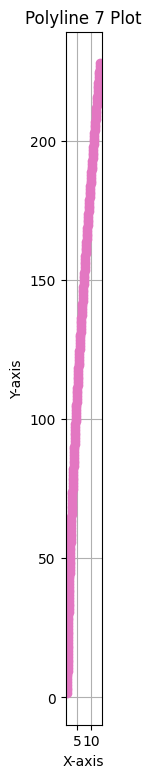

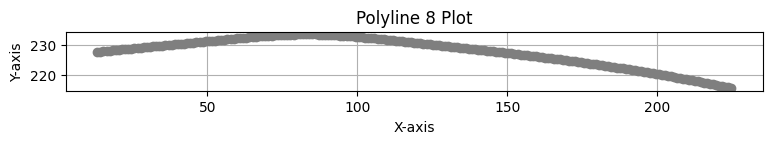

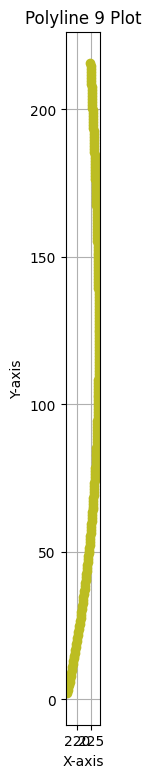

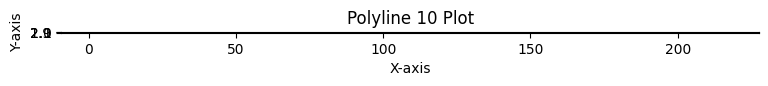

In [5]:
# Example usage
csv_filepath = 'problems/frag0.csv'  # Replace with your CSV file path

polylines = read_csv(csv_filepath)
plot_all_polylines(polylines)  # Plot all polylines with different colors
plot_individual_polylines(polylines)  # Plot each polyline separately

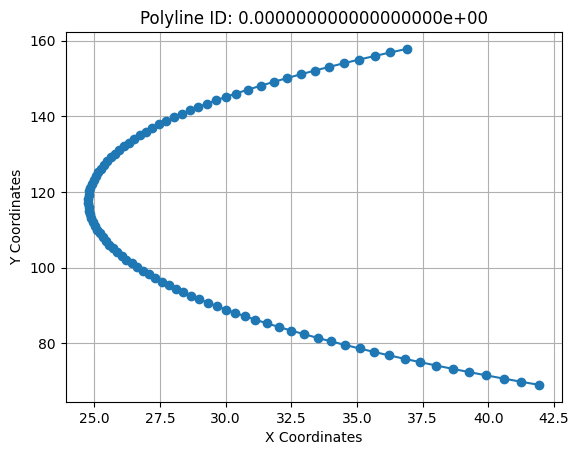

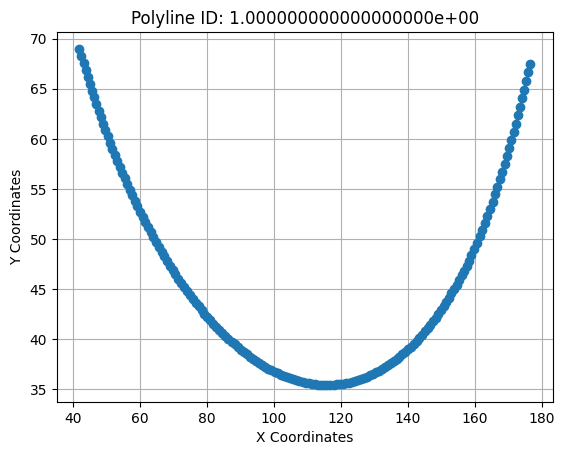

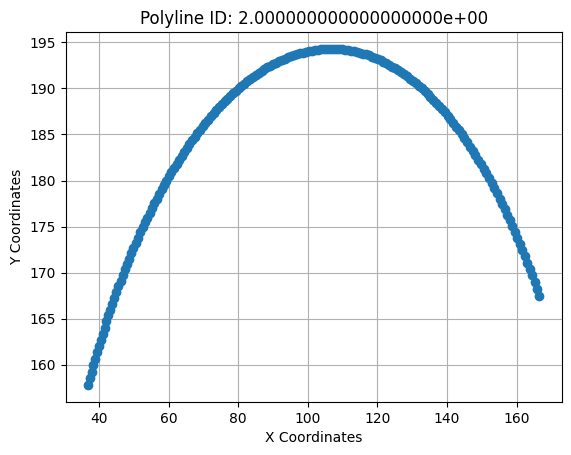

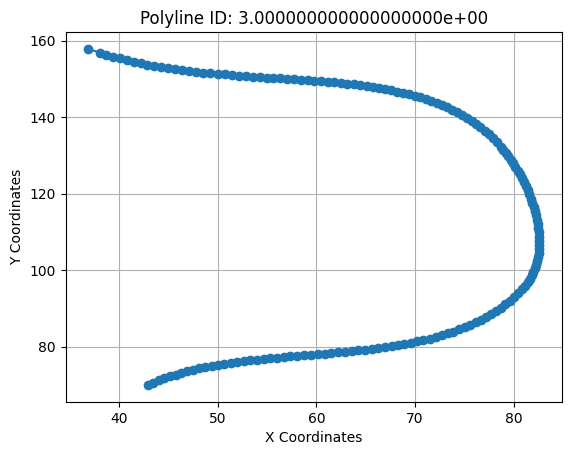

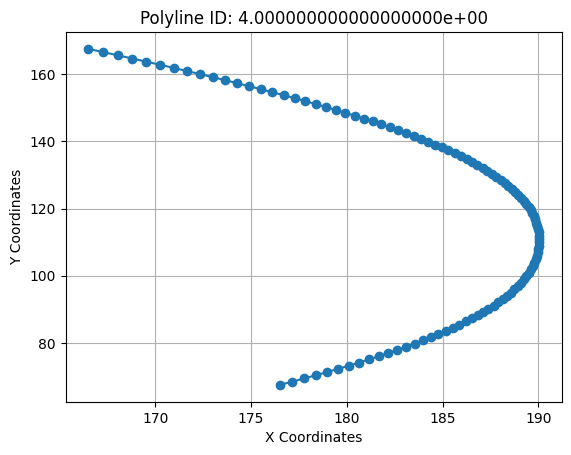

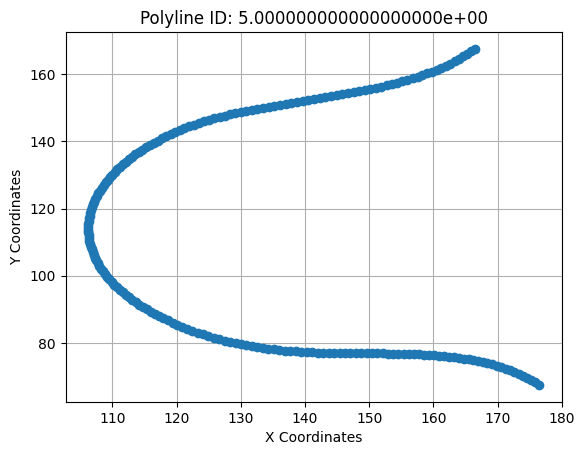

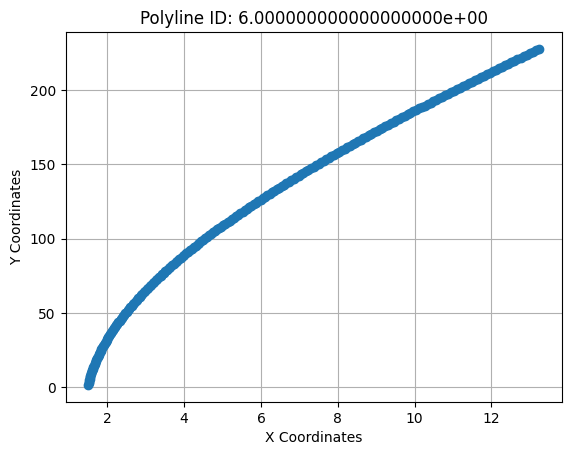

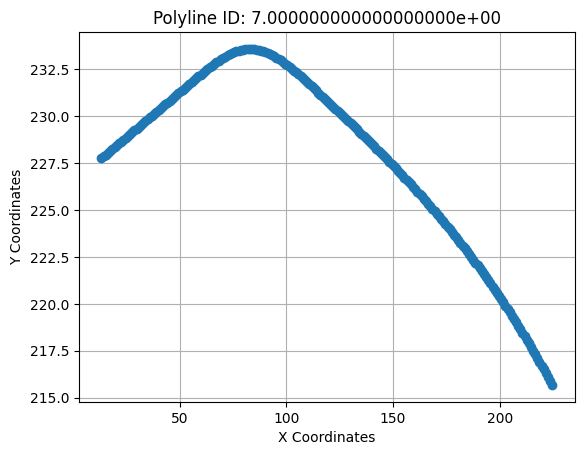

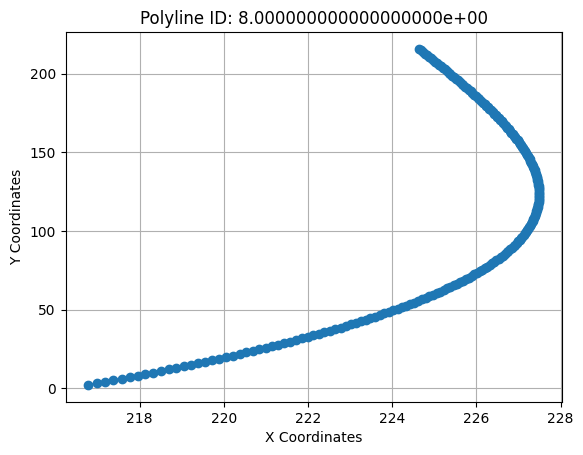

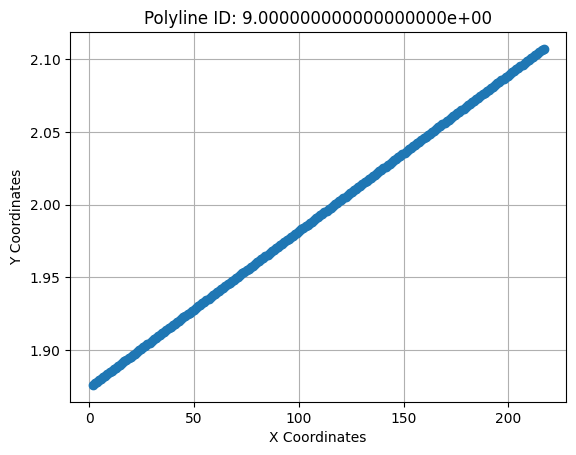

In [6]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

def group_by_polyline_id(file_path):
    grouped_data = defaultdict(lambda: {'points': []})
    
    with open(file_path, mode='r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            polyline_id = row[0]
            order_of_points = float(row[1])  # Order of points
            x_coordinate = float(row[2])
            y_coordinate = float(row[3])
            
            grouped_data[polyline_id]['points'].append({
                'order': order_of_points,
                'x': x_coordinate,
                'y': y_coordinate
            })
    
    return grouped_data

def plot_polylines(grouped_data):
    for polyline_id, data in grouped_data.items():
        points = sorted(data['points'], key=lambda x: x['order'])
        x_coords = [point['x'] for point in points]
        y_coords = [point['y'] for point in points]
        
        plt.figure()
        plt.plot(x_coords, y_coords, marker='o')
        plt.title(f'Polyline ID: {polyline_id}')
        plt.xlabel('X Coordinates')
        plt.ylabel('Y Coordinates')
        plt.grid(True)
        plt.show()

# Example usage
file_path = 'problems/frag0.csv'
grouped_data = group_by_polyline_id(file_path)
plot_polylines(grouped_data)


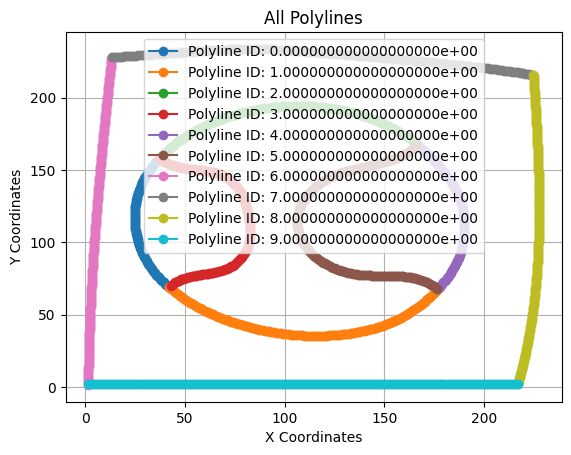

In [7]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import itertools

def group_by_polyline_id(file_path):
    grouped_data = defaultdict(lambda: {'points': []})
    
    with open(file_path, mode='r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            polyline_id = row[0]
            order_of_points = float(row[1])  # Order of points
            x_coordinate = float(row[2])
            y_coordinate = float(row[3])
            
            grouped_data[polyline_id]['points'].append({
                'order': order_of_points,
                'x': x_coordinate,
                'y': y_coordinate
            })
    
    return grouped_data

def plot_all_polylines(grouped_data):
    # Create a color cycle iterator
    colors = itertools.cycle(plt.cm.tab10.colors)
    
    plt.figure()
    
    for polyline_id, data in grouped_data.items():
        points = sorted(data['points'], key=lambda x: x['order'])
        x_coords = [point['x'] for point in points]
        y_coords = [point['y'] for point in points]
        
        plt.plot(x_coords, y_coords, marker='o', label=f'Polyline ID: {polyline_id}', color=next(colors))
    
    plt.title('All Polylines')
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
file_path = 'problems/frag0.csv'
grouped_data = group_by_polyline_id(file_path)
plot_all_polylines(grouped_data)


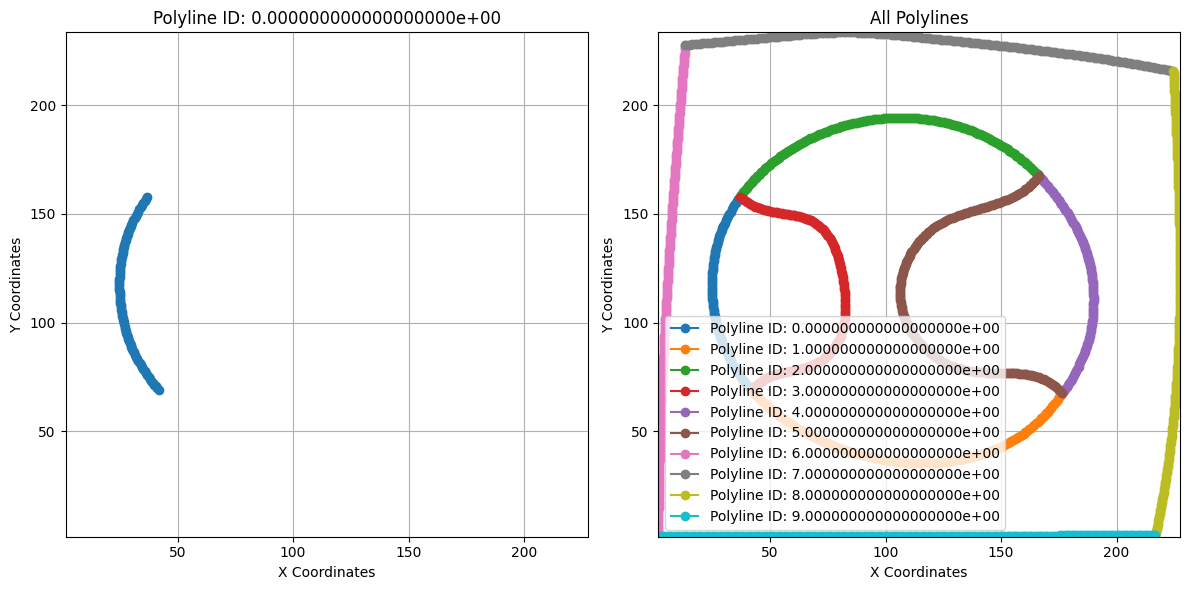

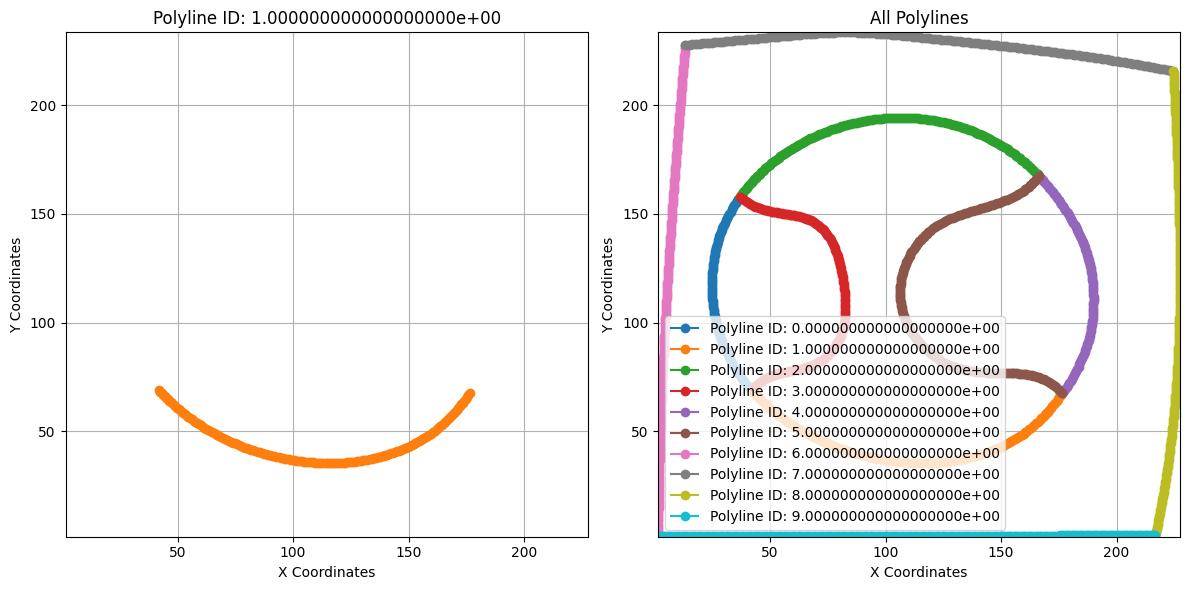

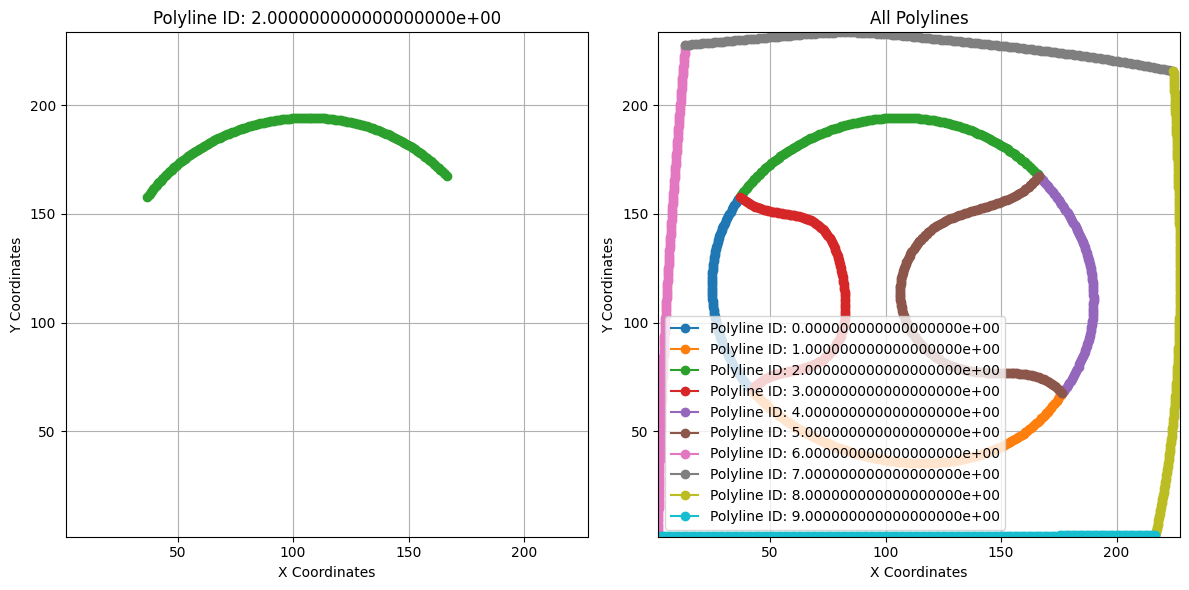

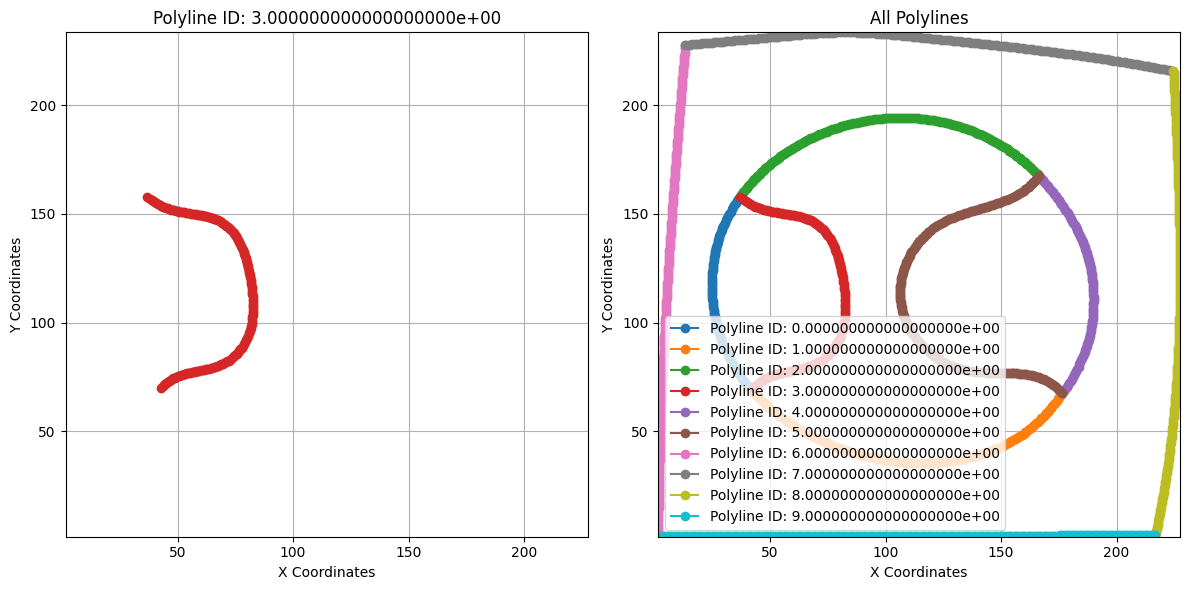

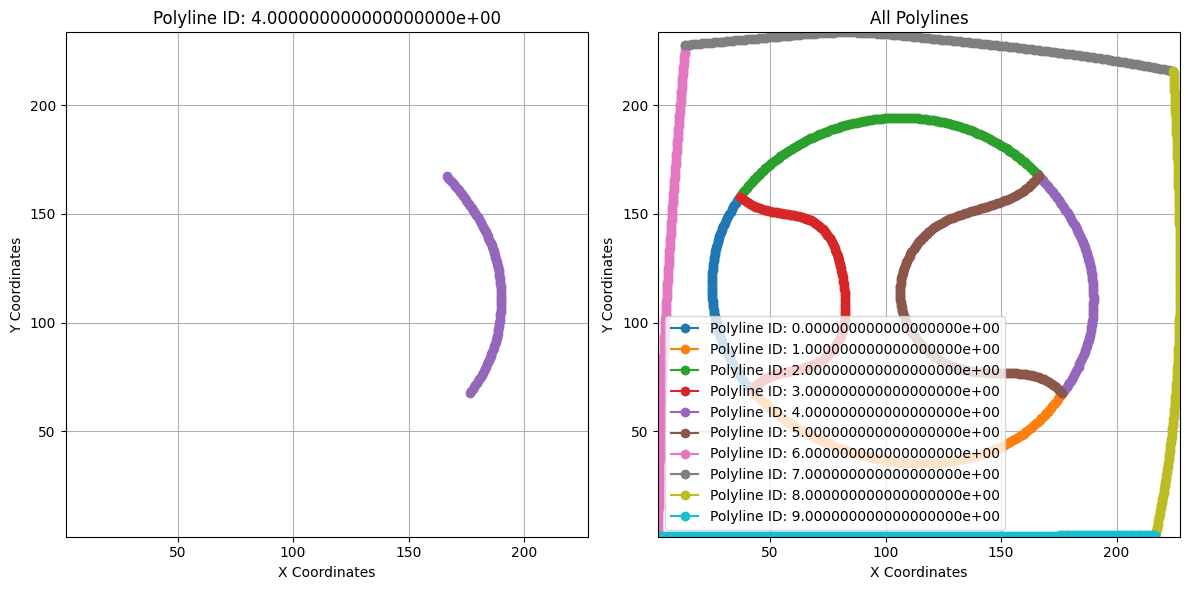

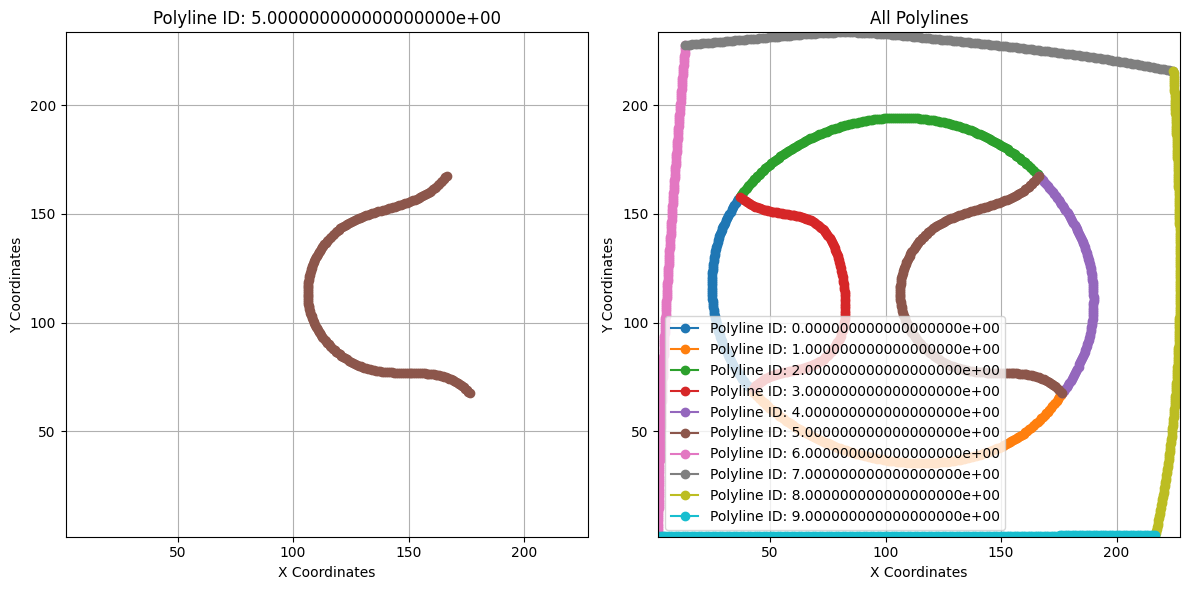

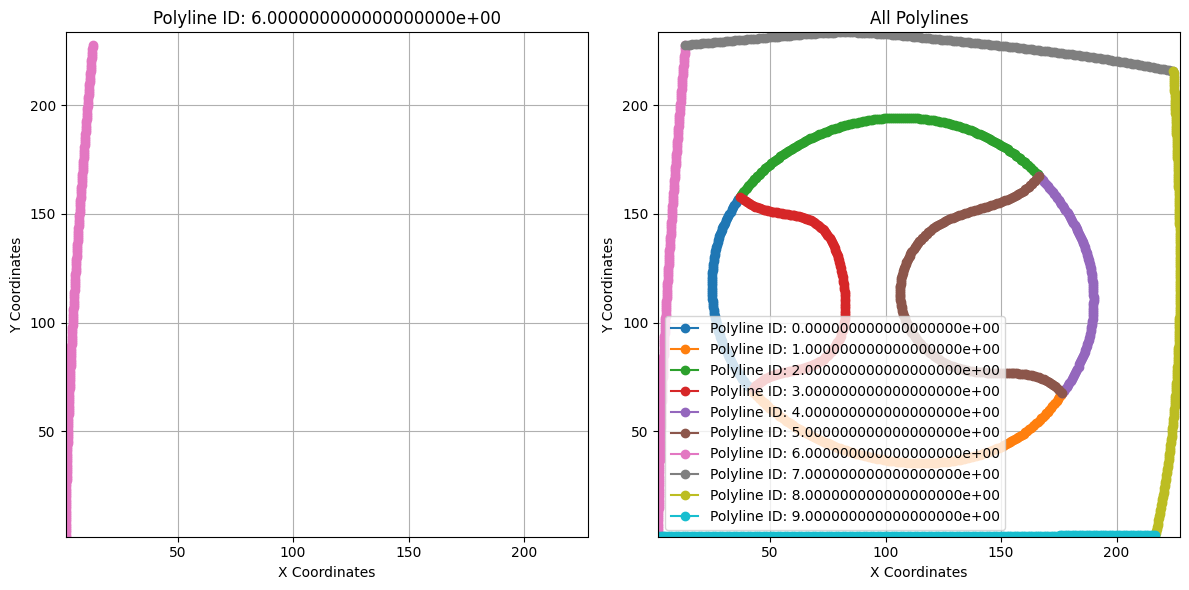

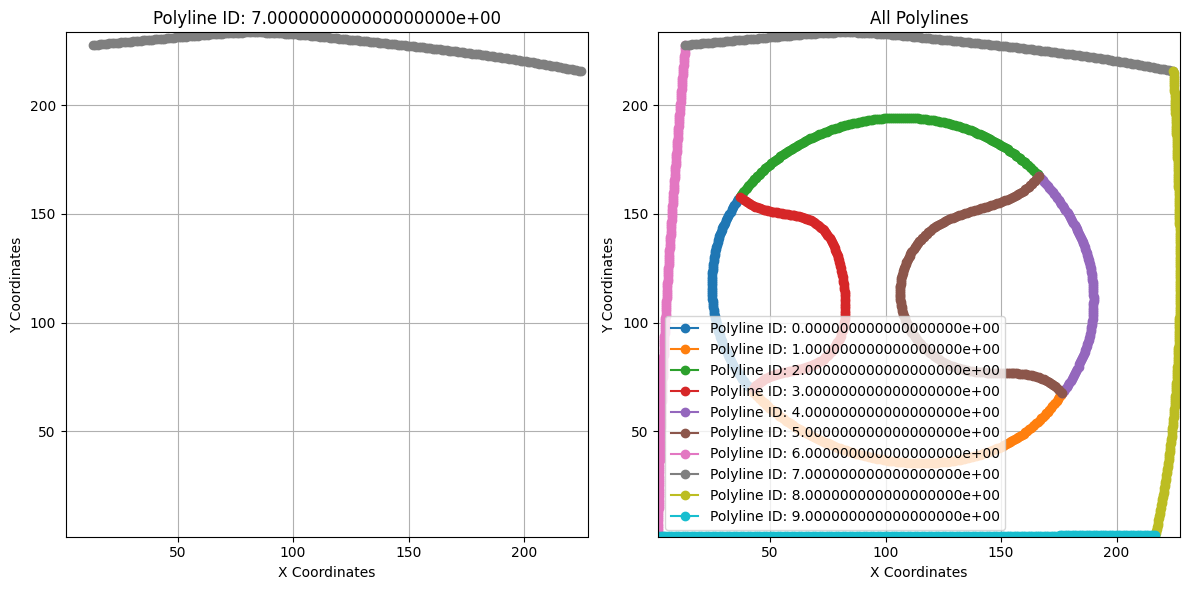

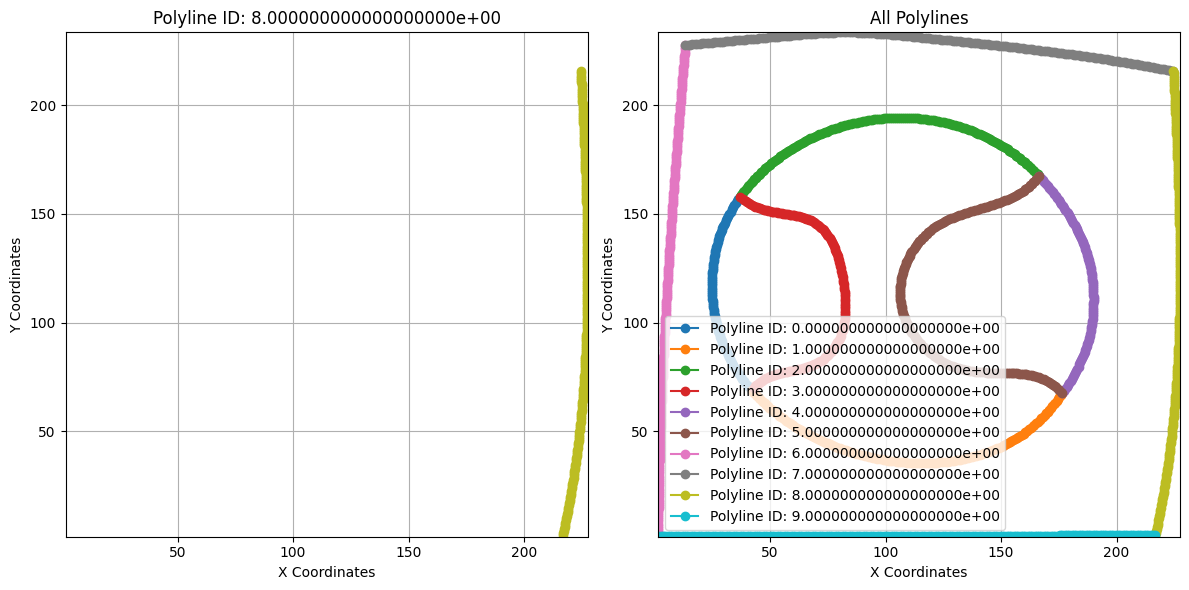

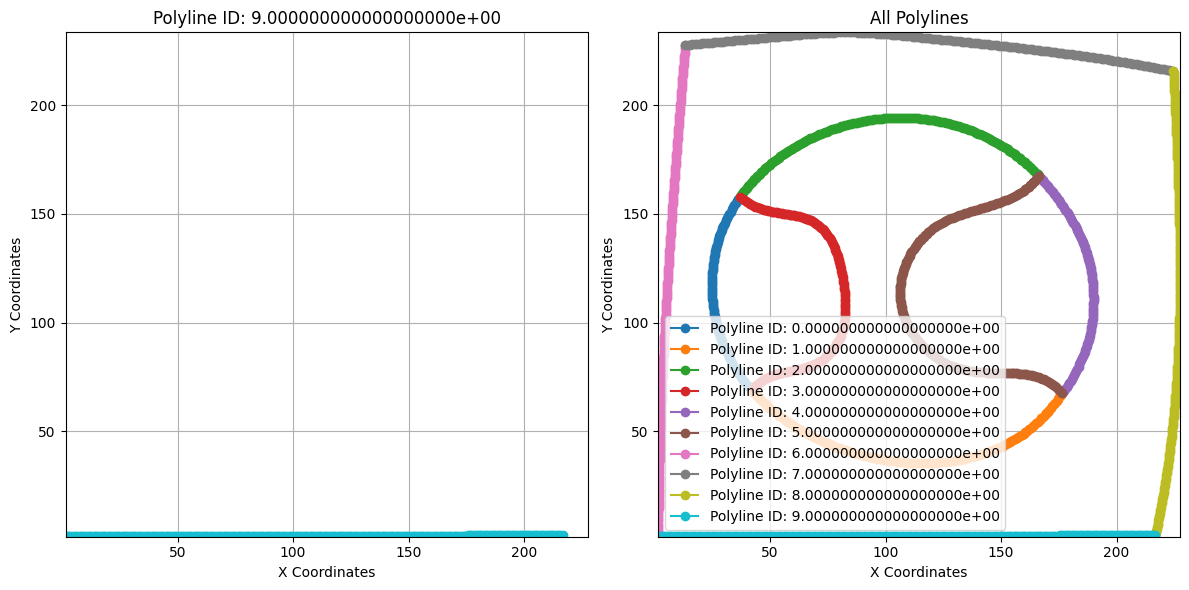

In [8]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import itertools

def group_by_polyline_id(file_path):
    grouped_data = defaultdict(lambda: {'points': []})
    
    with open(file_path, mode='r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            polyline_id = str(row[0])  # Ensure polyline_id is treated as a string
            order_of_points = float(row[1])  # Order of points
            x_coordinate = float(row[2])
            y_coordinate = float(row[3])
            
            grouped_data[polyline_id]['points'].append({
                'order': order_of_points,
                'x': x_coordinate,
                'y': y_coordinate
            })
    
    return grouped_data

def plot_polylines_side_by_side(grouped_data):
    # Create a color cycle iterator
    colors = itertools.cycle(plt.cm.tab10.colors)
    color_map = {}

    # First pass: Create the color map
    for polyline_id in grouped_data.keys():
        color_map[polyline_id] = next(colors)

    # Calculate the axis limits based on all polylines
    all_x_coords = []
    all_y_coords = []
    for data in grouped_data.values():
        points = sorted(data['points'], key=lambda x: x['order'])
        x_coords = [point['x'] for point in points]
        y_coords = [point['y'] for point in points]
        all_x_coords.extend(x_coords)
        all_y_coords.extend(y_coords)
    
    x_min, x_max = min(all_x_coords), max(all_x_coords)
    y_min, y_max = min(all_y_coords), max(all_y_coords)

    for polyline_id, data in grouped_data.items():
        color = color_map[polyline_id]

        points = sorted(data['points'], key=lambda x: x['order'])
        x_coords = [point['x'] for point in points]
        y_coords = [point['y'] for point in points]

        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Plot individual polyline on the left
        axes[0].plot(x_coords, y_coords, marker='o', color=color)
        axes[0].set_title(f'Polyline ID: {polyline_id}')
        axes[0].set_xlabel('X Coordinates')
        axes[0].set_ylabel('Y Coordinates')
        axes[0].set_xlim(x_min, x_max)
        axes[0].set_ylim(y_min, y_max)
        axes[0].grid(True)

        # Plot the entire image on the right
        for pid, pdata in grouped_data.items():
            ppoints = sorted(pdata['points'], key=lambda x: x['order'])
            px_coords = [point['x'] for point in ppoints]
            py_coords = [point['y'] for point in ppoints]
            axes[1].plot(px_coords, py_coords, marker='o', label=f'Polyline ID: {pid}', color=color_map[pid])
        
        axes[1].set_title('All Polylines')
        axes[1].set_xlabel('X Coordinates')
        axes[1].set_ylabel('Y Coordinates')
        axes[1].set_xlim(x_min, x_max)
        axes[1].set_ylim(y_min, y_max)
        axes[1].grid(True)
        axes[1].legend()

        plt.tight_layout()
        plt.show()

# Example usage
file_path = 'problems/frag0.csv'
grouped_data = group_by_polyline_id(file_path)
plot_polylines_side_by_side(grouped_data)
